In [1]:

'''
解决汉字乱码问题
'''
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体
plt.rcParams['axes.unicode_minus'] = False
import os
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体
plt.rcParams['axes.unicode_minus'] = False


# 1. 加载数据
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"{os.path.basename(file_path)} 加载成功")
        return data
    except Exception as e:
        print(f"{os.path.basename(file_path)} 加载失败:", e)
        return None


# 2. 数据清理
def clean_data(data):
    # 检查缺失值
    missing_data = data.isnull().sum()
    print("缺失值统计:\n", missing_data[missing_data > 0])

    # 检查重复值
    duplicates = data.duplicated().sum()
    print("重复值数量:", duplicates)

    return data


file_paths = {
    "用户行为表": "电商平台行为数据表/用户行为表.csv",
    "用户表": "电商平台行为数据表/用户表.csv",
    "用户评论表": "电商平台行为数据表/用户评论表.csv",
    "用户购买信息表": "电商平台行为数据表/用户购买信息表.csv",
    "订单表": "电商平台行为数据表/订单表.csv"
}
# 加载各个CSV文件
user_behavior = load_data(file_paths["用户行为表"])
user_info = load_data(file_paths["用户表"])
user_comments = load_data(file_paths["用户评论表"])
purchase_info = load_data(file_paths["用户购买信息表"])
orders = load_data(file_paths["订单表"])

用户行为表.csv 加载成功
用户表.csv 加载成功
用户评论表.csv 加载成功
用户购买信息表.csv 加载成功
订单表.csv 加载成功


In [2]:
user_info.info()
'''
无空值不用数据清洗
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   买家会员名               3410 non-null   int64  
 1   收货地址                3410 non-null   object 
 2   买家实际支付金额            3410 non-null   float64
 3   宝贝种类                3410 non-null   int64  
 4   宝贝总数量               3410 non-null   int64  
 5   购买数量                3410 non-null   int64  
 6   儿童/小学生_购买数量         3410 non-null   int64  
 7   幼儿_购买数量             3410 non-null   int64  
 8   幼儿/儿童_购买数量          3410 non-null   int64  
 9   幼儿/儿童/小学生_购买数量      3410 non-null   int64  
 10  新生儿_购买数量            3410 non-null   int64  
 11  新生儿/幼儿_购买数量         3410 non-null   int64  
 12  新生儿/幼儿/儿童_购买数量      3410 non-null   int64  
 13  新生儿/幼儿/儿童/小学生_购买数量  3410 non-null   int64  
 14  购买次数                3410 non-null   int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 399.7

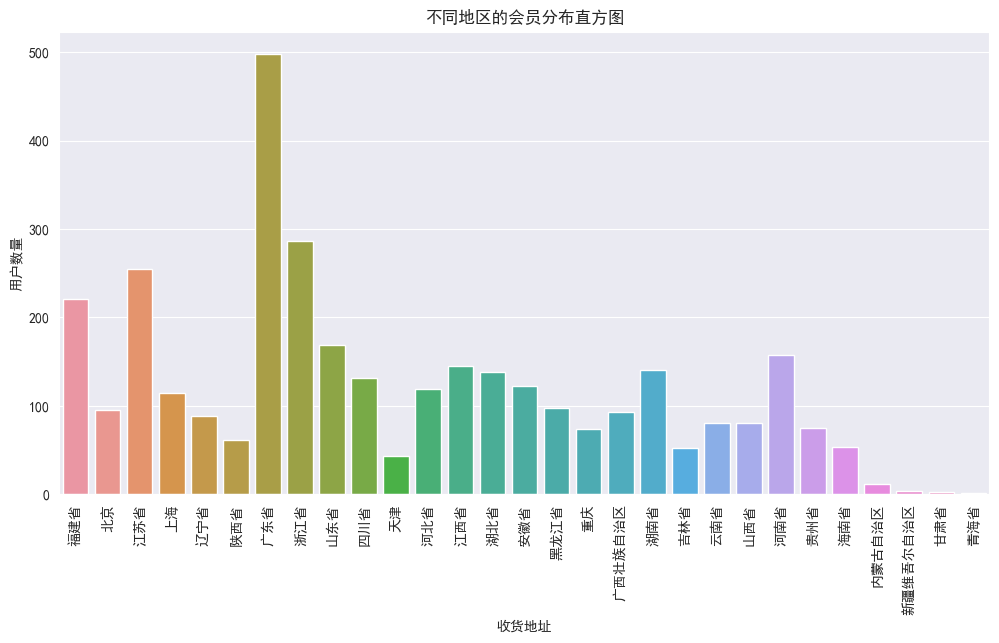

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(data=user_info, x='收货地址')
plt.title('不同地区的会员分布直方图')
plt.xticks(rotation=90)
plt.ylabel("用户数量")
plt.show()

D:\apk\anaconda\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\apk\anaconda\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(


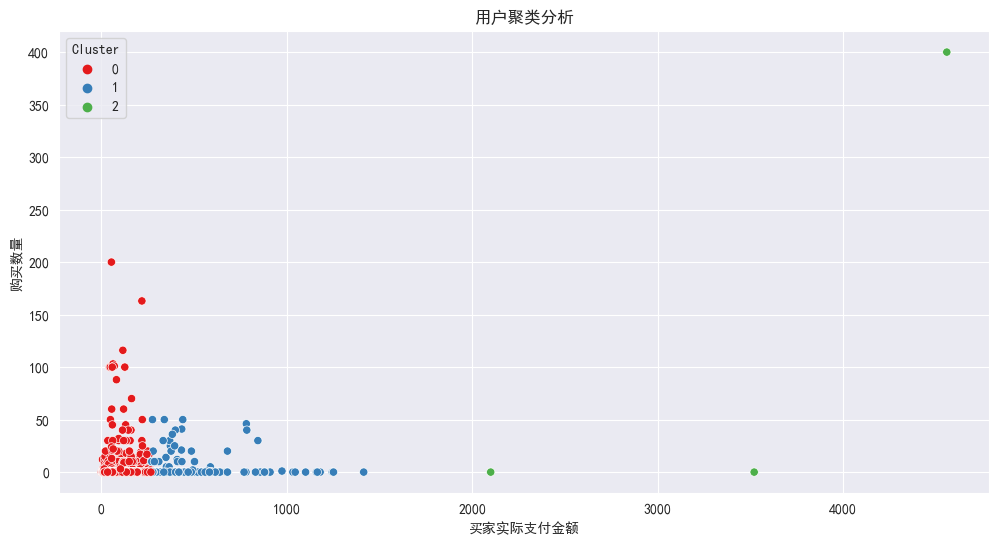

        聚类分析:

通过K-means算法，将用户根据他们的购买行为（支付金额、购买数量、购买次数）分为3个群体。这些群体代表了具有相似购买模式的用户。
可视化效果:

散点图展示了不同群体的用户在支付金额和购买数量上的分布情况。
通过颜色区分，可以直观地看到不同聚类的用户之间的差异。
商业洞察:

识别出不同的用户群体可以帮助你进行更有针对性的市场营销和产品推荐。例如，可能会发现某个聚类的用户购买金额高但购买次数少，表明他们可能是高价值客户，可以通过定制化的促销策略来吸引他们进行更多的购买。
另一个聚类可能是购买频率高但支付金额低的用户，这可能指向需要价格敏感的客户群体。


In [8]:
from sklearn.cluster import KMeans

# 选择数值特征进行聚类
features = user_info[['买家实际支付金额', '购买数量', '购买次数']]
kmeans = KMeans(n_clusters=3)  # 假设分成3个群体
user_info['Cluster'] = kmeans.fit_predict(features)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=user_info, x='买家实际支付金额', y='购买数量', hue='Cluster', palette='Set1')
plt.title('用户聚类分析')
plt.show()
print('''        聚类分析:

通过K-means算法，将用户根据他们的购买行为（支付金额、购买数量、购买次数）分为3个群体。这些群体代表了具有相似购买模式的用户。
可视化效果:

散点图展示了不同群体的用户在支付金额和购买数量上的分布情况。
通过颜色区分，可以直观地看到不同聚类的用户之间的差异。
商业洞察:

识别出不同的用户群体可以帮助你进行更有针对性的市场营销和产品推荐。例如，可能会发现某个聚类的用户购买金额高但购买次数少，表明他们可能是高价值客户，可以通过定制化的促销策略来吸引他们进行更多的购买。
另一个聚类可能是购买频率高但支付金额低的用户，这可能指向需要价格敏感的客户群体。''')

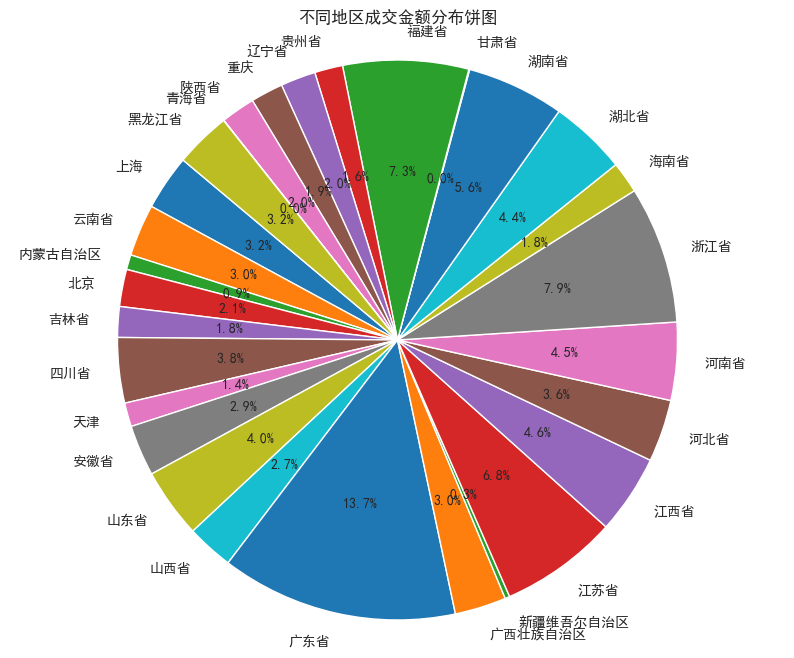

In [7]:
region_summary = user_info.groupby('收货地址')['买家实际支付金额'].sum().reset_index()

# 绘制饼图
plt.figure(figsize=(10, 8))
plt.pie(region_summary['买家实际支付金额'], labels=region_summary['收货地址'], autopct='%1.1f%%', startangle=140)
plt.title('不同地区成交金额分布饼图')
plt.axis('equal')  # 确保饼图为圆形
plt.show()